In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [25]:
# plot the scores
def plot_scores_for_text(keys, values, title, xlabel, labels, colors=['darkslategray', 'teal', 'darkturquoise']):
    
    X_axis = np.arange(len(keys))
  
    for idx, val in enumerate(values):
        plt.bar(X_axis+((idx-1)*0.2), val, label=labels[idx], color=colors[idx], width=0.2)
    
    plt.xticks(X_axis, keys)
    plt.title(title)
    plt.ylabel('Number of answer phrases')
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

In [26]:
def parse_suitability_scores():
    data = {}
    with open('./data/suitability.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if 'Context id: ' in row[0]:
                current_id = row[0].split(': ')[1].strip()
                data[current_id] = {'answer': [], 'scores': [], 'disagreement': [], 'joint_scores': [], 'joint_score_stats': {'m':0, 'ok':0, 'd':0}}
            else:
                data[current_id]['answer'].append(row[0])
                scores = [int(row[1]), int(row[2])]
                data[current_id]['scores'].append(scores)
                d = np.abs(scores[0]-scores[1])
                data[current_id]['disagreement'].append(d)
                if d < 1:
                    data[current_id]['joint_score_stats']['m'] += 1
                    data[current_id]['joint_scores'].append(scores[0])
                elif d < 2:
                    data[current_id]['joint_score_stats']['ok'] += 1
                    data[current_id]['joint_scores'].append(np.max(scores))
                else: # not ok score
                    data[current_id]['joint_score_stats']['d'] += 1
                    data[current_id]['joint_scores'].append(-1)
    return data


In [27]:
def get_disagreement_stats_joint(scores):
    num_d = 0
    num_ok = 0
    num_m = 0
    for id, val in scores.items():
        print('id:', id)
        # print('val:', val)
        num_m += val['joint_score_stats']['m']
        num_ok += val['joint_score_stats']['ok']
        num_d += val['joint_score_stats']['d']
        sum = val['joint_score_stats']['m'] + val['joint_score_stats']['ok'] + val['joint_score_stats']['d']
        #print('match: ', val['joint_score_stats']['m']/sum)
        #print('diff 1: ', val['joint_score_stats']['ok']/sum)
        #print('disagreement: ', val['joint_score_stats']['d']/sum)

    total = num_m + num_ok + num_d
    print('matching: ', num_m/total)
    print('ok: ', num_ok/total)
    print('disagreement: ', num_d/total)

In [28]:
def get_annotator_scores(scores):
    joint = []
    joint_ok = []
    a_1 = []
    a_2 = []
    for id, val in scores.items():
        #print('id:', id)
        # print('val:', val)
        scores = val['scores'] # 2d array
        joint_scores = val['joint_scores']
        joint += joint_scores
        for idx, score in enumerate(scores):
            a_1.append(str(score[0]))
            a_2.append(str(score[1]))
            if joint_scores[idx] > -1:
                joint_ok.append(joint_scores[idx])
    return joint, a_1, a_2, joint_ok

    

In [29]:
def plot_proximity_stats(values, names, title, bins=4, colors=['darkslategray', 'teal', 'darkturquoise'], is_arr=True):
    n_bins = 4
    bins = n_bins
    n, bins, patches = plt.hist(values, color=colors, bins=bins, label=names, align='mid')
    if is_arr:
        patches = patches[0]
    ticks = [(patch.xy[0] + 1.6)/2 for patch in patches]
    ticks = []
    for idx, patch in enumerate(patches):
        ticks.append(patch.xy[0] + 0.3) # 0.3 is the width of the patch
    n_bins = 4
    ticklabels = [i for i in range(n_bins)]
    plt.xticks(ticks, ticklabels)
    plt.ylabel('Number of answer phrases')
    plt.xlabel('Suitability score')
    plt.title(title)
    plt.legend()
    plt.show()


In [30]:
def get_num_of_class(scores):
    len_s = len(scores)
    scores_count = {'0':0, '1':0, '2':0, '3':0}
    for i in range(len_s):
        key = str(scores[i])
        scores_count[key] += 1
    return scores_count


id: 1
id: 2
id: 3
id: 11
id: 13
id: 17
id: 20
id: 26
id: 40
matching:  0.34782608695652173
ok:  0.3333333333333333
disagreement:  0.3188405797101449


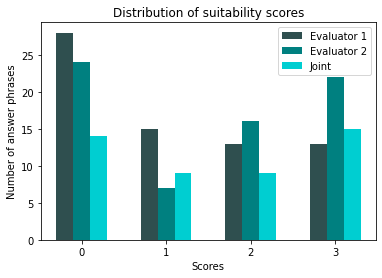

A1 frac 2/3:  0.37681159420289856
A1 avg num 2/3:  2.888888888888889
A2 frac 2/3:  0.5507246376811594
A1 avg num 2/3:  4.222222222222222
Joint frac 2/3:  0.5106382978723404
joint avg num 2/3:  2.6666666666666665
A1 frac 3:  0.18840579710144928
A1 avg num 3:  1.4444444444444444
A2 frac 3:  0.3188405797101449
A1 avg num 3:  1.7777777777777777
Joint frac 3:  0.3191489361702128
A1 avg num 2/3:  1.0


In [32]:
scores = parse_suitability_scores()
get_disagreement_stats_joint(scores)
joint, a_1, a_2, joint_ok = get_annotator_scores(scores)
a_1_s = get_num_of_class(a_1)
a_1_scores = [a_1_s['0'], a_1_s['1'], a_1_s['2'], a_1_s['3']]
a_2_s = get_num_of_class(a_2)
a_2_scores = [a_2_s['0'], a_2_s['1'], a_2_s['2'], a_2_s['3']]
joint_s = get_num_of_class(joint_ok)
joint_scores = [joint_s['0'], joint_s['1'], joint_s['2'], joint_s['3']]
# plot_proximity_stats([a_1, a_2, joint_ok], ['Evaluator 1', 'Evaluator 2', 'Joint'], 'Distribution of suitability scores', 4) <-- not working!!
labels = ['Evaluator 1', 'Evaluator 2', 'Joint']
values = [a_1_scores, a_2_scores, joint_scores]
keys = ['0', '1', '2', '3']
title = 'Distribution of suitability scores'
xlabel = 'Scores'
plot_scores_for_text(keys, values, title, xlabel, labels)

# number of 2/3
print('A1 frac 2/3: ', (a_1_s['2']+a_1_s['3'])/len(a_1))
print('A1 avg num 2/3: ', (a_1_s['2']+a_1_s['3'])/9)
print('A2 frac 2/3: ', (a_2_s['2']+a_2_s['3'])/len(a_1))
print('A1 avg num 2/3: ', (a_2_s['2']+a_2_s['3'])/9)
print('Joint frac 2/3: ', (joint_s['2']+joint_s['3'])/len(joint_ok))
print('joint avg num 2/3: ', (joint_s['2']+joint_s['3'])/9)

print('A1 frac 3: ', (a_1_s['3'])/len(a_1))
print('A1 avg num 3: ', (a_1_s['2'])/9)
print('A2 frac 3: ', (a_2_s['3'])/len(a_1))
print('A1 avg num 3: ', (a_2_s['2'])/9)
print('Joint frac 3: ', (joint_s['3'])/len(joint_ok))
print('A1 avg num 2/3: ', (joint_s['2'])/9)


In [23]:
p_o = 0.34782608695652173
num_items = a_2_scores[0] + a_2_scores[1] + a_2_scores[2] + a_2_scores[3]
p_e = a_1_scores[0]/num_items * a_2_scores[0]/num_items + a_1_scores[1]/num_items * a_2_scores[1]/num_items + a_1_scores[2]/num_items * a_2_scores[2]/num_items + a_1_scores[3]/num_items * a_2_scores[3]/num_items
k = 1 - (1-p_o)/(1-p_e)
print('p_o: ', p_o)
print('p_e: ', p_e)
print('kappa: ', k)

p_o:  0.34782608695652173
p_e:  0.2669607225372821
kappa:  0.11031518624641834


keys:  ['1', '2', '3', '11', '13', '17', '20', '26', '40']
values:  [[4, 2, 2, 2, 2, 4, 1, 4, 3], [6, 1, 1, 1, 1, 5, 3, 4, 1], [2, 0, 0, 2, 3, 2, 5, 7, 1]]


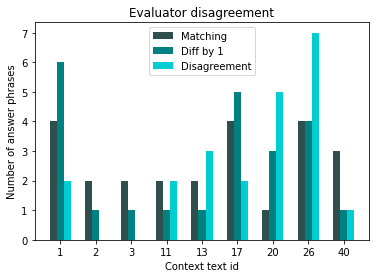

In [16]:
keys = list(scores.keys())
values_m = [val['joint_score_stats']['m'] for val in list(scores.values())]
values_d = [val['joint_score_stats']['d'] for val in list(scores.values())]
values_ok = [val['joint_score_stats']['ok'] for val in list(scores.values())]
labels = ['Matching', 'Diff by 1', 'Disagreement']
values = [values_m, values_ok, values_d]
print('keys: ', keys)
print('values: ', values)
title = 'Evaluator disagreement'
xlabel = 'Context text id'
plot_scores_for_text(keys, values, title, xlabel, labels)

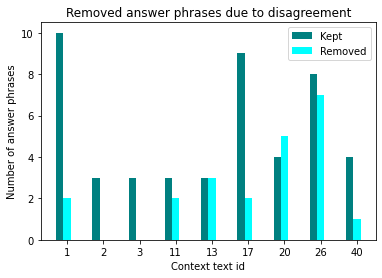

In [17]:
all_accepted = []
for i in range(len(values_m)):
    all_accepted.append(values_m[i] + values_ok[i])

labels = ['Kept', 'Removed']
values = [all_accepted, values_d]
title = 'Removed answer phrases due to disagreement'
xlabel = 'Context text id'
plot_scores_for_text(keys, values, title, xlabel, labels, ['teal', 'cyan'])

In [18]:
def plot_score_text_distribution(all_joint_scores, title):
    a_s_0 = []
    a_s_1 = []
    a_s_2 = []
    a_s_3 = []
    for score in all_joint_scores:
        s_0 = 0
        s_1 = 0
        s_2 = 0
        s_3 = 0
        for s in score:
            if s == 0:
                s_0 += 1
            elif s == 1:
                s_1 += 1
            elif s == 2:
                s_2 += 1
            elif s == 3:
                s_3 += 1
        a_s_0.append(s_0)
        a_s_1.append(s_1)
        a_s_2.append(s_2)
        a_s_3.append(s_3)

    labels = ['0', '1', '2', '3']
    values = [a_s_0, a_s_1, a_s_2, a_s_3]
    print('keys: ', keys)
    print('values: ', values)
    xlabel = 'Context text id'
    plot_scores_for_text(keys, values, title, xlabel, labels, ['cyan', 'teal', 'magenta', 'rebeccapurple'])

[[3, 0, 3, 0, 3, -1, 3, 3, -1, 3, 2, 3], [3, 3, 0], [0, 3, 2], [3, 3, -1, -1, 0], [2, -1, 1, -1, 0, -1], [-1, 1, 0, -1, 3, 1, 0, 2, 2, 0, 1], [-1, 3, 1, -1, 2, -1, -1, 1, -1], [2, -1, -1, 0, 1, 2, -1, -1, -1, -1, 0, 0, -1, 2, 1], [-1, 1, 0, 0, 3]]
keys:  ['1', '2', '3', '11', '13', '17', '20', '26', '40']
values:  [[2, 1, 1, 1, 1, 3, 0, 3, 2], [0, 0, 0, 0, 1, 3, 2, 2, 1], [1, 0, 1, 0, 1, 2, 1, 3, 0], [7, 2, 1, 2, 0, 1, 1, 0, 1]]


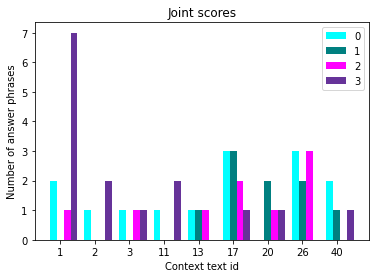

In [19]:
all_joint_scores = [val['joint_scores'] for val in list(scores.values())]
print(all_joint_scores)
plot_score_text_distribution(all_joint_scores, 'Joint scores')

[[2, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3], [2, 3, 0], [0, 3, 2], [2, 3, 1, 0, 0], [2, 3, 0, 3, 0, 0], [3, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0], [3, 3, 1, 3, 1, 0, 3, 1, 2], [1, 3, 0, 0, 0, 2, 2, 2, 3, 2, 0, 0, 2, 1, 1], [2, 0, 0, 0, 3]]
keys:  ['1', '2', '3', '11', '13', '17', '20', '26', '40']
values:  [[3, 1, 1, 1, 2, 4, 4, 9, 3], [2, 0, 1, 0, 2, 5, 2, 2, 1], [4, 0, 0, 0, 2, 1, 2, 4, 0], [3, 2, 1, 4, 0, 1, 1, 0, 1]]


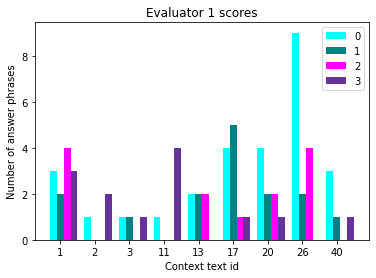

keys:  ['1', '2', '3', '11', '13', '17', '20', '26', '40']
values:  [[2, 1, 1, 2, 3, 6, 1, 5, 3], [0, 0, 0, 1, 0, 0, 3, 3, 0], [2, 1, 1, 1, 1, 3, 1, 5, 1], [8, 1, 1, 1, 2, 2, 4, 2, 1]]


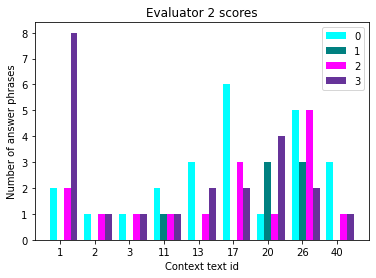

In [20]:
all_ev1_scores = [val['scores'] for val in list(scores.values())]
ev_1 = []
ev_2 = []
for score in all_ev1_scores:
    e_1 = []
    e_2 = []
    for s in score:
        e_1.append(s[0])
        e_2.append(s[1])
    ev_1.append(e_1)
    ev_2.append(e_2)

print(ev_2)
plot_score_text_distribution(ev_1, 'Evaluator 1 scores')
plot_score_text_distribution(ev_2, 'Evaluator 2 scores')